/Users/max/Documents/PeakAI/rl4sc/vecenvs.py:361: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


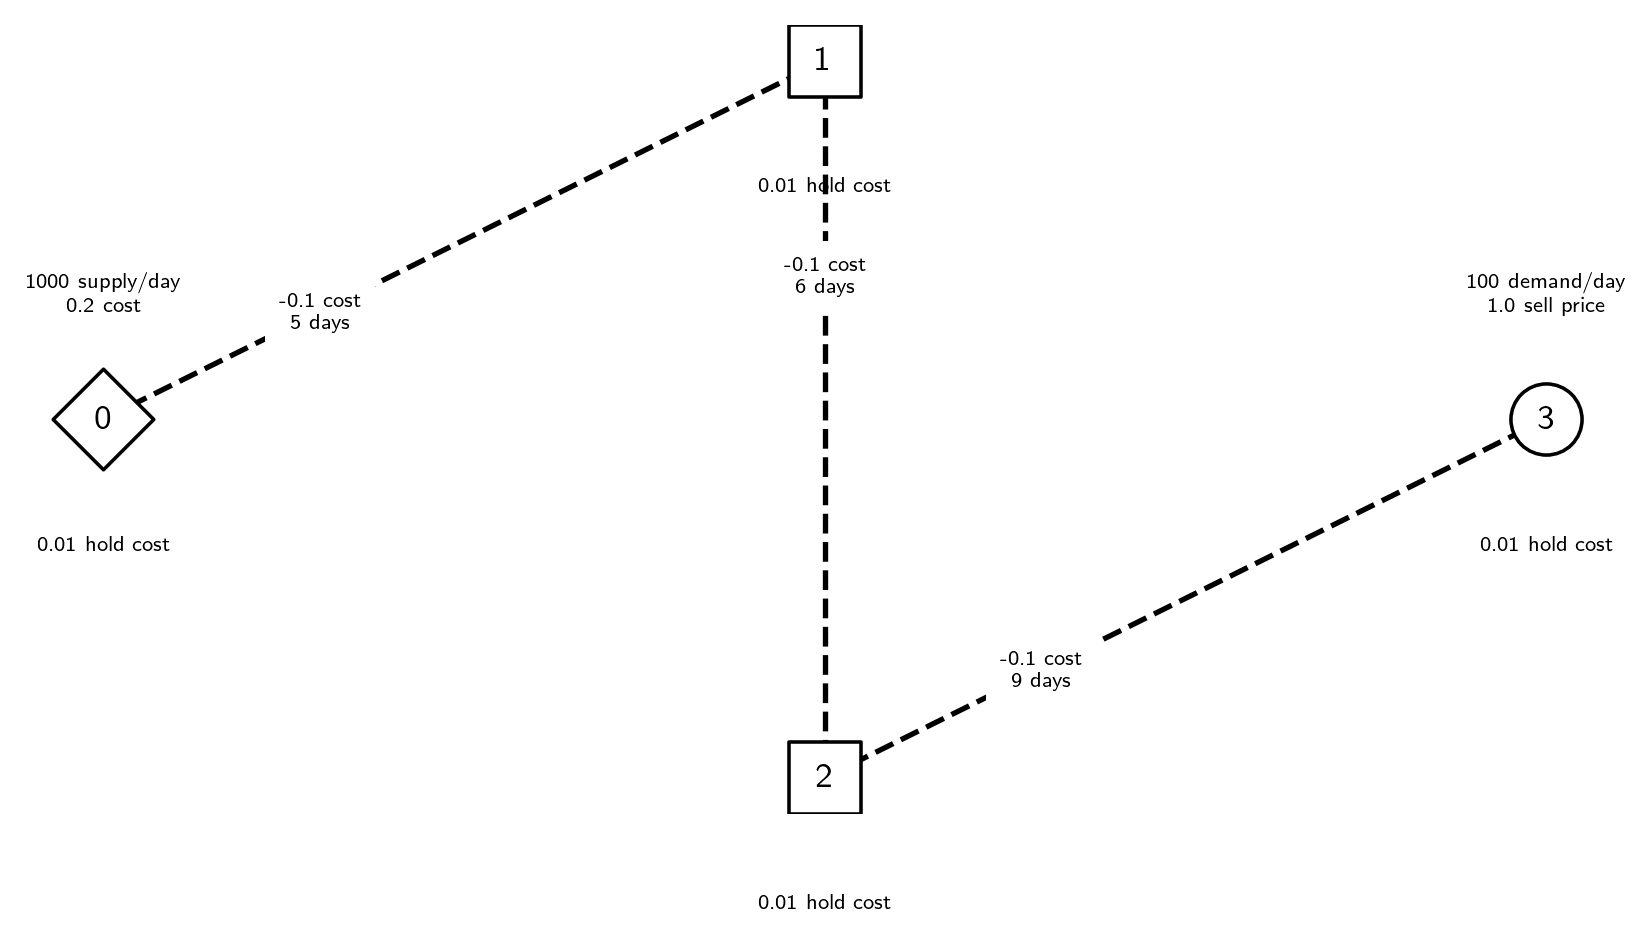

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import importlib
import pandas as pd
import vecenvs

from stable_baselines3 import A2C, PPO
from matplotlib import cm

importlib.reload(vecenvs)

plt.rcParams['text.usetex'] = True


np.random.seed(0)


setup_name = 'simple'

node_df = pd.read_csv(f'supplychains/{setup_name}/nodes.csv')
edge_df = pd.read_csv(f'supplychains/{setup_name}/edges.csv')

max_time = 25000

supply_nodes = np.array([0])
supply_amounts = np.random.poisson(1000, size=(len(supply_nodes), max_time))
supply_prices = 0.2 * np.ones(shape=(len(supply_nodes), max_time))

demand_nodes = np.array([3])
demand_prices = 1.0 * np.ones(shape=(len(demand_nodes), max_time))
demand_means = 100
demand_amounts = np.random.poisson(demand_means, size=(len(demand_nodes), max_time))

supplies = (supply_nodes, supply_amounts, supply_prices)
demands = (demand_nodes, demand_amounts, demand_prices)

num_envs = 1

env = vecenvs.VectorisedSupplyChain(node_df, edge_df, supplies, demands, max_time, num_envs, 
                                    update_interval=1000, demand_window_size=200)

env.plot_chain()